In [1]:
# get your hugging face hub token with write access from hugging face account - its free
import os
os.environ['HUGGING_FACE_HUB_TOKEN'] = 'xxxxxx'

In [5]:
!pip install tiktoken

     |████████████████████████████████| 953 kB 1.5 MB/s eta 0:00:01
You should consider upgrading via the '/Users/jportilla/.pyenv/versions/3.10.0/bin/python3.10 -m pip install --upgrade pip' command.


In [4]:
!pip install --upgrade transformers

You should consider upgrading via the '/Users/jportilla/.pyenv/versions/3.10.0/bin/python3.10 -m pip install --upgrade pip' command.


In [ ]:
#https://huggingface.co/microsoft/phi-2


In [6]:
# load the model from transformers - I did this on Colab Pro as it require atleast 20 gigs on ram
from transformers import AutoModelForCausalLM, AutoTokenizer

#model_id = "tiiuae/falcon-7b-instruct"
#model_id ="stabilityai/stable-code-3b"
#model_id = "stabilityai/stablelm-2-1_6b"
model_id = "stabilityai/stablelm-2-1_6b"

model = AutoModelForCausalLM.from_pretrained(
        model_id, 
        device_map="auto",
        offload_folder = "offload",
        trust_remote_code=True)

tokenizer = AutoTokenizer.from_pretrained(model_id, trust_remote_code=True)

arcade100k.tiktoken: 100%|██████████| 1.68M/1.68M [00:00<00:00, 7.30MB/s]


In [7]:
print("Model", model)

Model StableLMEpochForCausalLM(
  (model): StableLMEpochModel(
    (embed_tokens): Embedding(100352, 2048)
    (layers): ModuleList(
      (0-23): 24 x DecoderLayer(
        (self_attn): Attention(
          (q_proj): Linear(in_features=2048, out_features=2048, bias=True)
          (k_proj): Linear(in_features=2048, out_features=2048, bias=True)
          (v_proj): Linear(in_features=2048, out_features=2048, bias=True)
          (o_proj): Linear(in_features=2048, out_features=2048, bias=False)
          (rotary_emb): RotaryEmbedding()
        )
        (mlp): MLP(
          (gate_proj): Linear(in_features=2048, out_features=5632, bias=False)
          (up_proj): Linear(in_features=2048, out_features=5632, bias=False)
          (down_proj): Linear(in_features=5632, out_features=2048, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LayerNorm((2048,), eps=1e-05, elementwise_affine=True)
        (post_attention_layernorm): LayerNorm((2048,), eps=1e-05, elementwi

In [3]:
print(model)

# if have you loaded your model correctly, you will see an output like below

FalconForCausalLM(
  (transformer): FalconModel(
    (word_embeddings): Embedding(65024, 4544)
    (h): ModuleList(
      (0-31): 32 x FalconDecoderLayer(
        (self_attention): FalconAttention(
          (maybe_rotary): FalconRotaryEmbedding()
          (query_key_value): FalconLinear(in_features=4544, out_features=4672, bias=False)
          (dense): FalconLinear(in_features=4544, out_features=4544, bias=False)
          (attention_dropout): Dropout(p=0.0, inplace=False)
        )
        (mlp): FalconMLP(
          (dense_h_to_4h): FalconLinear(in_features=4544, out_features=18176, bias=False)
          (act): GELU(approximate='none')
          (dense_4h_to_h): FalconLinear(in_features=18176, out_features=4544, bias=False)
        )
        (input_layernorm): LayerNorm((4544,), eps=1e-05, elementwise_affine=True)
      )
    )
    (ln_f): LayerNorm((4544,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=4544, out_features=65024, bias=False)
)


In [7]:
print(model)


StableLMEpochForCausalLM(
  (model): StableLMEpochModel(
    (embed_tokens): Embedding(50304, 2560)
    (layers): ModuleList(
      (0-31): 32 x DecoderLayer(
        (self_attn): Attention(
          (q_proj): Linear(in_features=2560, out_features=2560, bias=False)
          (k_proj): Linear(in_features=2560, out_features=2560, bias=False)
          (v_proj): Linear(in_features=2560, out_features=2560, bias=False)
          (o_proj): Linear(in_features=2560, out_features=2560, bias=False)
          (rotary_emb): RotaryEmbedding()
        )
        (mlp): MLP(
          (gate_proj): Linear(in_features=2560, out_features=6912, bias=False)
          (up_proj): Linear(in_features=2560, out_features=6912, bias=False)
          (down_proj): Linear(in_features=6912, out_features=2560, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LayerNorm((2560,), eps=1e-05, elementwise_affine=True)
        (post_attention_layernorm): LayerNorm((2560,), eps=1e-05, elementwise_a

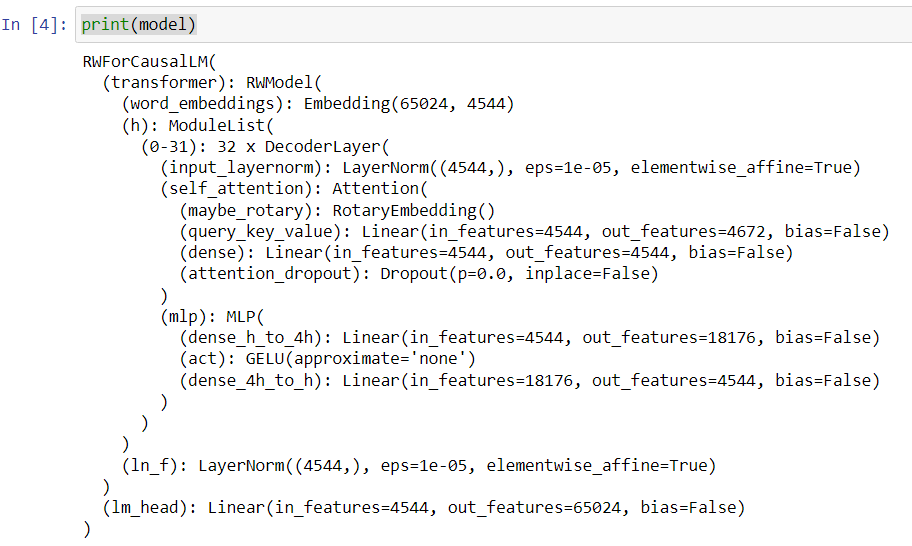

In [8]:
# provide a remote path, its like a repo name where your model is gonna get saved in huggingface hub
#REMOTE_PATH = "portilla911/falcon-7b-instruct-sharded"
#model_id = "model_id ="stabilityai/stablelm-2-1_6b""
#REMOTE_PATH = "portilla911/stable-code-3b-sharded"
REMOTE_PATH = "portilla911/stablelm-2-1_6b-sharded"

# push tokenizer to hub
tokenizer.push_to_hub(REMOTE_PATH)

# CRUCIAL STEP - As model is bigger we are sharding it into small portion to load it with less RAM memory
model.push_to_hub(REMOTE_PATH,                   
                  max_shard_size="2GB", 
                  safe_serialization=True)

Upload 4 LFS files:   0%|          | 0/4 [00:00<?, ?it/s]
















































































































































































































































































































































































































































































































































































































































































































































































































































































































































































CommitInfo(commit_url='https://huggingface.co/portilla911/stablelm-2-1_6b-sharded/commit/8db2a11209b965ece264ca0c44a198a80bf04137', commit_message='Upload StableLMEpochForCausalLM', commit_description='', oid='8db2a11209b965ece264ca0c44a198a80bf04137', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
#stabilityai/stable-code-3b
#https://huggingface.co/stabilityai/stable-code-3b
